In [113]:
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
def rel_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [115]:
input_size = 4
hidden_size = 10
num_class = 3
num_input = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_class, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_input, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()    

In [116]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.680272093239262e-08


In [117]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


In [118]:
from cs231n.gradient_check import eval_numerical_gradient

In [119]:
loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))    

b2 max relative error: 4.447646e-11
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
W1 max relative error: 3.561318e-09


In [123]:
net = init_toy_model()
stats = net.train(X, y, X, y,
                 learning_rate=1e-1, reg=5e-6,
                 num_iters=100, verbose=False)
print('Final training loss: ', stats['loss_his'][-1])

Final training loss:  0.017149607938732093


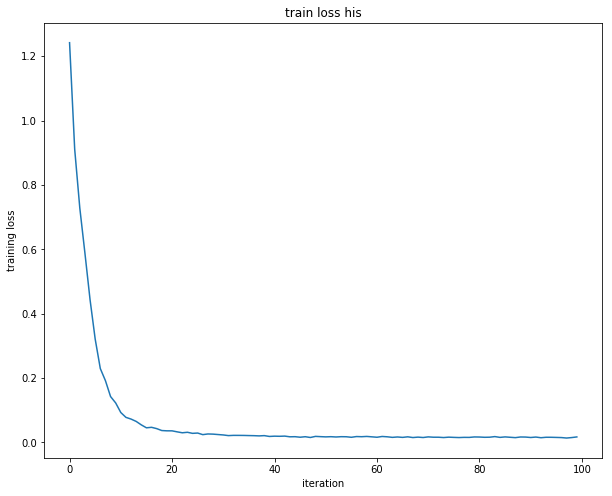

In [124]:
plt.plot(stats['loss_his'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('train loss his')
plt.show()

In [125]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [127]:
input_size = 32*32*3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
                 learning_rate=1e-4, learning_rate_decay=0.95, reg=0.25,
                 num_iters=1000, batch_size=200, verbose=True)

val_acc = np.mean(net.predict(X_val) == y_val)
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302947
iteration 100 / 1000: loss 2.302587
iteration 200 / 1000: loss 2.299371
iteration 300 / 1000: loss 2.267308
iteration 400 / 1000: loss 2.199613
iteration 500 / 1000: loss 2.168712
iteration 600 / 1000: loss 2.102172
iteration 700 / 1000: loss 1.986720
iteration 800 / 1000: loss 2.036548
iteration 900 / 1000: loss 2.022348
Validation accuracy:  0.287


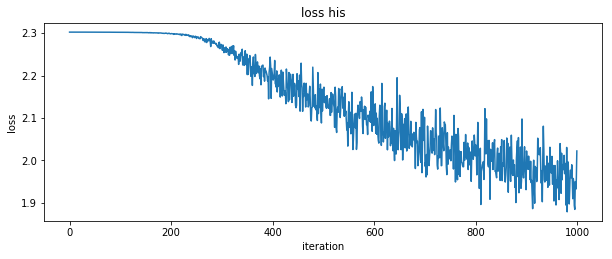

In [129]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_his'])
plt.title('loss his')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

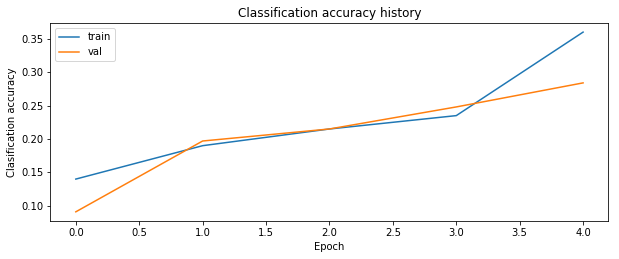

In [131]:
plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_his'], label='train')
plt.plot(stats['val_acc_his'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

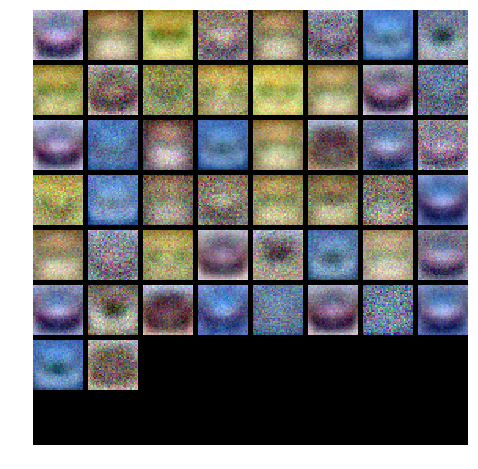

In [133]:
from cs231n.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype(np.uint8))
    plt.gca().axis('off')
    plt.show()
    
show_net_weights(net)

In [134]:
best_net = None

max_cnt = 100
input_size = 32 * 32 * 3
num_class = 10

hidden_size = 100
batch_size = 200

best_acc = 0.0
best_lr = 0.0
best_reg = 0.0

for cnt in range(max_cnt):
    learning_rate = 10**np.random.uniform(-7, -3)
    reg = 10**np.random.uniform(-5, 5)
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=1000, batch_size=batch_size,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=reg, verbose=False)

    val_acc = (net.predict(X_val) == y_val).mean()
    if val_acc > best_acc:
        best_acc = val_acc
        best_net = net
        best_lr = learning_rate
        best_reg = reg
print('lr: %.4g, reg: %.4g, val accuracy: %.1f%%' %(best_lr, best_reg, best_acc*100))    


/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:32: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(np.exp(correct_score) / np.sum(np.exp(stable_scores), axis=1)))
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:29: RuntimeWarning: overflow encountered in subtract
  stable_scores = scores - np.max(scores, axis=1, keepdims=True)
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:33: RuntimeWarning: overflow encountered in double_scalars
  loss = loss/N + reg * np.sum(W1 * W1) + reg * np.sum(W2 * W2)
/home/lzhang/documentation/cs231n/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:29: RuntimeWarning: invalid value encountered in subtract
  stable_scores = scores - np.max(scores, axis=1, keepdims=True)
/home/lzhang/anaconda3/envs/cs231n/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountere

lr: 0.0004685, reg: 0.009023, val accuracy: 47.6%


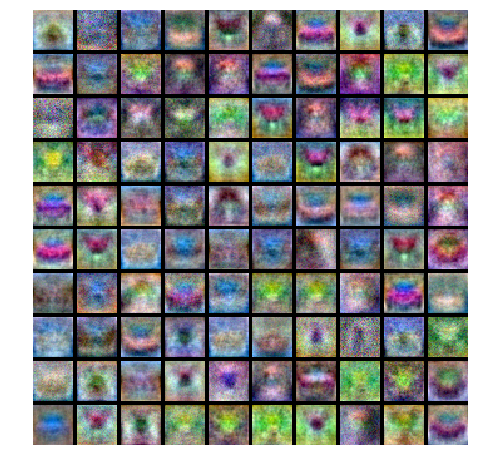

In [135]:
show_net_weights(best_net)

iteration 0 / 100: loss 1.473653


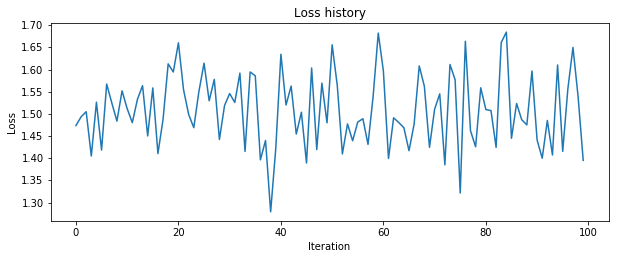

In [140]:
stats = best_net.train(X_train, y_train, X_val, y_val)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_his'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

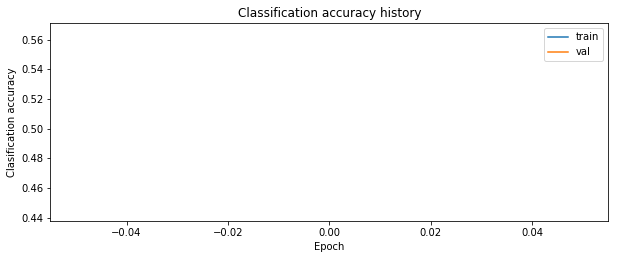

In [141]:
plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_his'], label='train')
plt.plot(stats['val_acc_his'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [142]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.454
